# Load and explore the data

## Import the libraries

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import calendar and stats from the scipy library
import calendar
from scipy import stats

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

### Load the Seattle data

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/jngakwa/weather/refs/heads/main/data/seattle_rain.csv')

### Load Medford data

In [3]:
df_medford = pd.read_csv('https://raw.githubusercontent.com/jngakwa/weather/refs/heads/main/data/mfr_rain.csv')

## Explore the data sets 

##### Start by looking at the head of each data frame.

This will let us see the names of the columns and a few example values for each column.

In [4]:
df_medford.head(20)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-01,NaN,NaN,0.00,NaN,NaN
1,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-02,NaN,NaN,0.00,NaN,NaN
2,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-03,NaN,NaN,0.00,NaN,NaN
3,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-04,NaN,NaN,0.17,NaN,NaN
4,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-05,NaN,NaN,0.11,NaN,NaN
5,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-06,NaN,NaN,0.00,NaN,NaN
6,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-07,NaN,NaN,0.00,NaN,NaN
7,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-08,NaN,NaN,0.00,NaN,NaN
8,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-09,NaN,NaN,0.08,NaN,NaN
9,US1ORJC0060,"MEDFORD 6.6 SSW, OR US",2018-01-10,NaN,NaN,0.23,NaN,NaN


In [5]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


An observation is that **_The columns in the data sets are not the same_**. Looks like the Seattle dataframe contains more columns than the Medford dataframe.  
We can also view this using the ``.columns`` which gives a list of the column names

In [6]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [7]:
df_medford.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

##### Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

This enables us to see to identify any issues that may arise when using the data to draw conclusions on the topic

In [8]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Looking at the above result, we can tell that the dataframe has a total of 1658 rows. However, the PRCP column only has 1636 non-null entries

In [9]:
df_medford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49101 entries, 0 to 49100
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  49101 non-null  object 
 1   NAME     49101 non-null  object 
 2   DATE     49101 non-null  object 
 3   DAPR     957 non-null    float64
 4   MDPR     957 non-null    float64
 5   PRCP     48144 non-null  float64
 6   SNOW     32652 non-null  float64
 7   SNWD     8607 non-null   float64
dtypes: float64(5), object(3)
memory usage: 3.0+ MB


Similarly, the Medford dataframe has a total of 49101 rows. However, the PRCP column only has 48144 non-null entries

**The Medford data set includes more columns than the Seattle set**

Medford: 8 columns, 49101 rows

Seattle: 10 columns, 1658 rows

We can find this out too utilizing the ``shape`` property

In [10]:
df_seattle.shape

(1658, 10)

In [11]:
df_medford.shape

(49101, 8)

#### Examine the `STATION` column

The code below checks to see how many stations there are in the Medford dataframe.

In [12]:
df_medford['NAME']

0             MEDFORD 6.6 SSW, OR US
1             MEDFORD 6.6 SSW, OR US
2             MEDFORD 6.6 SSW, OR US
3             MEDFORD 6.6 SSW, OR US
4             MEDFORD 6.6 SSW, OR US
                    ...             
49096    CENTRAL POINT 5.2 NW, OR US
49097    CENTRAL POINT 5.2 NW, OR US
49098    CENTRAL POINT 5.2 NW, OR US
49099    CENTRAL POINT 5.2 NW, OR US
49100    CENTRAL POINT 5.2 NW, OR US
Name: NAME, Length: 49101, dtype: object

How many unique stations are there in medford?

In [13]:
df_medford['STATION'].nunique()

47

Medford has 47 different stations while Seattle only has one

In [14]:
df_seattle['STATION'].nunique()

1

#### Examine the `DATE` column


In [15]:
df_medford['DATE']

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
49096    2022-12-27
49097    2022-12-28
49098    2022-12-29
49099    2022-12-30
49100    2022-12-31
Name: DATE, Length: 49101, dtype: object

In [16]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

The date columns are not in the same format.

### Convert `DATE` to datetime

We will change the dates on both dataframes to make sure that they are of the same format using pandas ``.to_datetime`` function.

In [17]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

C:\Users\njeng\AppData\Local\Temp\ipykernel_30288\3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [18]:
df_medford['DATE'] = pd.to_datetime(df_medford['DATE'])

The data sets have same datetime making it easier for comparison

### What range of dates are present?

In [19]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [20]:
df_medford['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

We have the same start and end dates for Medford and Seattle

### Are the data suitable for answering the question?

Plot the daily precipitation data for Seattle.

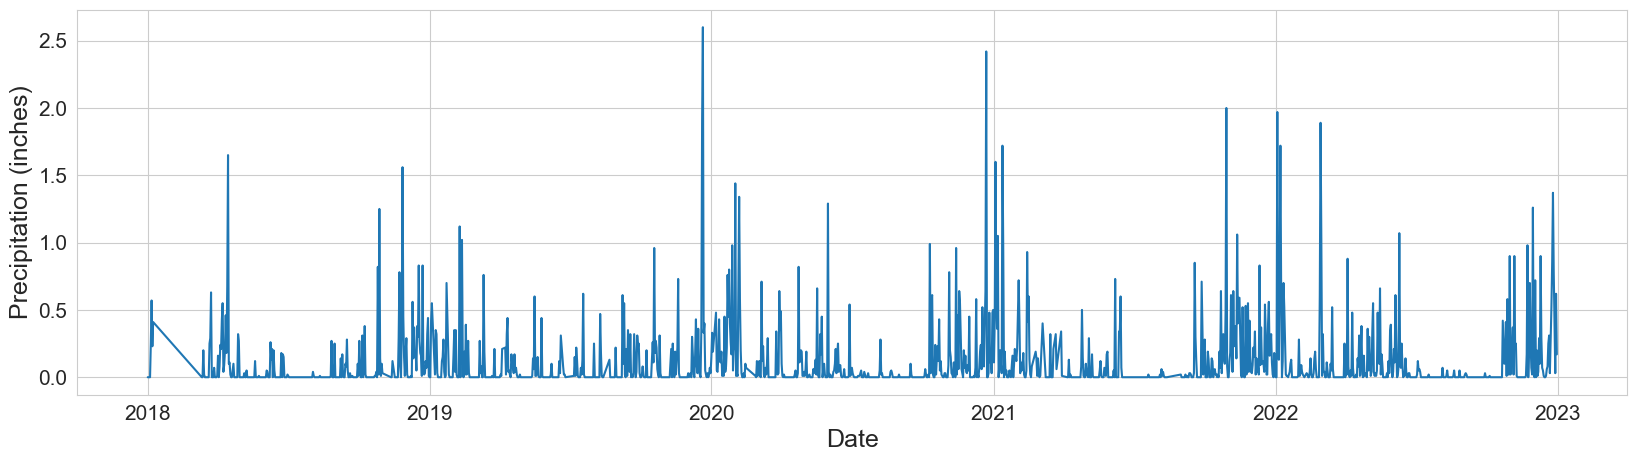

In [21]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

An observation made is that at the beginning of 2018, the plot shows odd behavior. Therefore, we will dive deep to figure out what was taking place at that time.

In [22]:
df_seattle.head(20)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


Looking at the Date column, rows 7 and 8 show a significance date change. i.e there is a jump from January 8, 2018 to March 12, 2018.

#### Investigate the station columns

Using the ``unique()`` method, the goal is to identify how many stations there are

In [23]:
df_medford['STATION'].unique()

array(['US1ORJC0060', 'USC00356152', 'US1ORJC0064', 'US1ORJC0086',
       'US1ORJC0088', 'US1ORJC0087', 'US1ORJC0120', 'US1ORJC0002',
       'US1ORJC0123', 'US1ORJC0089', 'US1ORJC0100', 'US1ORJC0122',
       'US1ORJC0048', 'US1ORJC0025', 'US1ORJC0069', 'US1ORJC0005',
       'US1ORJC0027', 'US1ORJC0104', 'US1ORJC0008', 'US1ORJC0029',
       'US1ORJC0108', 'USW00024225', 'USC00350304', 'US1ORJC0091',
       'US1ORJC0090', 'US1ORJC0092', 'US1ORJC0051', 'US1ORJC0053',
       'US1ORJC0075', 'US1ORJC0097', 'USC00357391', 'US1ORJC0011',
       'US1ORJC0077', 'US1ORJC0099', 'US1ORJC0110', 'US1ORJC0054',
       'US1ORJC0098', 'US1ORJC0013', 'US1ORJC0057', 'US1ORJC0112',
       'US1ORJC0078', 'US1ORJC0111', 'US1ORJC0039', 'US1ORJC0116',
       'US1ORJC0038', 'US1ORJC0117', 'US1ORJC0119'], dtype=object)

In [24]:
df_medford['NAME'].nunique()

47

In [25]:
df_medford['NAME'].unique()

array(['MEDFORD 6.6 SSW, OR US',
       'NWS MEDFORD WEATHER FORECAST OFFICE, OR US',
       'ASHLAND 1.2 NNW, OR US', 'MEDFORD 4.7 SSW, OR US',
       'ASHLAND 0.5 N, OR US', 'MEDFORD 5.7 S, OR US',
       'MEDFORD 0.7 NNW, OR US', 'ASHLAND 1.4 ESE, OR US',
       'TALENT 0.9 SE, OR US', 'MEDFORD 5.1 SSW, OR US',
       'EAGLE POINT 6.4 SSE, OR US', 'TALENT 0.6 ESE, OR US',
       'JACKSONVILLE 0.2 E, OR US', 'ASHLAND 2.4 ESE, OR US',
       'ASHLAND 0.7 SSE, OR US', 'ASHLAND 1 SE, OR US',
       'JACKSONVILLE 8.9 WSW, OR US', 'JACKSONVILLE 3.9 SSW, OR US',
       'CENTRAL POINT 10 N, OR US', 'GOLD HILL 0.2 WSW, OR US',
       'ASHLAND 4.2 NNW, OR US', 'MEDFORD INTERNATIONAL AIRPORT, OR US',
       'ASHLAND, OR US', 'CENTRAL POINT 2.5 WNW, OR US',
       'MEDFORD 2.6 ESE, OR US', 'MEDFORD 4.2 WSW, OR US',
       'MEDFORD 3.5 SSW, OR US', 'MEDFORD 2.5 ESE, OR US',
       'MEDFORD 0.5 SSE, OR US', 'JACKSONVILLE 0.5 WSW, OR US',
       'RUCH, OR US', 'JACKSONVILLE 10 S, OR US', 'ASHLAND 

Due to the Medford data having multiple stations, will be choosing the *MEDFORD INTERNATIONAL AIRPORT, OR US* station to do the analysis.

In [26]:
df_medford = df_medford.loc[df_medford['NAME'] == 'MEDFORD INTERNATIONAL AIRPORT, OR US']

### Join the data frames keeping DATE and PRCP columns 

Will be using an outer join to combine the 2 dataframes to one and to keep all dates present

In [27]:
df_combined = df_medford[['DATE','PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [28]:
df_combined.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.13,0.00
3,2018-01-04,0.01,0.00
4,2018-01-05,0.11,0.25


Bellow, I will create a tidy data frame with columns for city and precipitation

In [29]:
df_combined = pd.melt(df_combined, id_vars='DATE', var_name='city', value_name='precipitation')

Now we will rename the cities labelled PRCP_y and PRCP_x to SEA and MDF for Seattle and Medford respectively

In [30]:
df_combined.loc[df_combined['city'] == 'PRCP_x', 'city'] = 'MDF'

In [31]:
df_combined.loc[df_combined['city'] == 'PRCP_y', 'city'] = 'SEA'

For uniformitty, the column DATE will be renamed using the rename() method

In [32]:
df_combined = df_combined.rename(columns={'DATE': 'date'})

### Identify and fill in any missing values 

In [33]:
df_combined.notna().sum()

date             3652
city             3652
precipitation    3462
dtype: int64

In [34]:
df_combined.isna().sum()

date               0
city               0
precipitation    190
dtype: int64

This tells me that the precipitation column has 190 missing units.

Next cause of action would be to determine where exactly those units are coming from. The code below will explore the precipitation values from both cities to identify where the null values are coming from.

In [35]:
df_combined.loc[df_combined['city'] == 'MDF', 'precipitation'].isna().sum()

np.int64(0)

In [36]:
df_combined.loc[df_combined['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

While the Medford data is not missing any values, the Seattle dataset seems to be missing 190 days of precipitation recorded

To account for the missing values, we will take the mean of the same date for the years available and fill the missing precipitation values for those dates with the mean. 

We will start by adding a column to the dataframe which will store each day of the year from 1 to 365
                                                                                                                                        

In [37]:
df_combined['day_of_year'] = pd.DatetimeIndex(df_combined['date']).day_of_year

Below is a computation of the mean for each day in Seattle averaged across the 5 years.  
Using .loc to access the only Seattle rows, precipitation and day_or_year columns. Then group by the day of year and calculate the mean.

In [38]:
mean_day_precipitation = df_combined.loc[
    df_combined['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

The next step will be identifying the indexes where the precipitation is missing

In [39]:
indices = np.where(df_combined['precipitation'].isna() == True)[0]

Now we replace each missing value with the mean on that day

In [40]:
for index in indices:
    df_combined.loc[index, 'precipitation'] = mean_day_precipitation.loc[df_combined.loc[index,'day_of_year']].values[0]

Export the clean .csv file

In [41]:
df_combined.to_csv('clean_seattle_medford_weather.csv', encoding='utf-8-sig', index=False)

## Create Plots for visualization and analysis

Will create different plots to help visualize the precipitation for each city.  
The first plot will be a line plot.

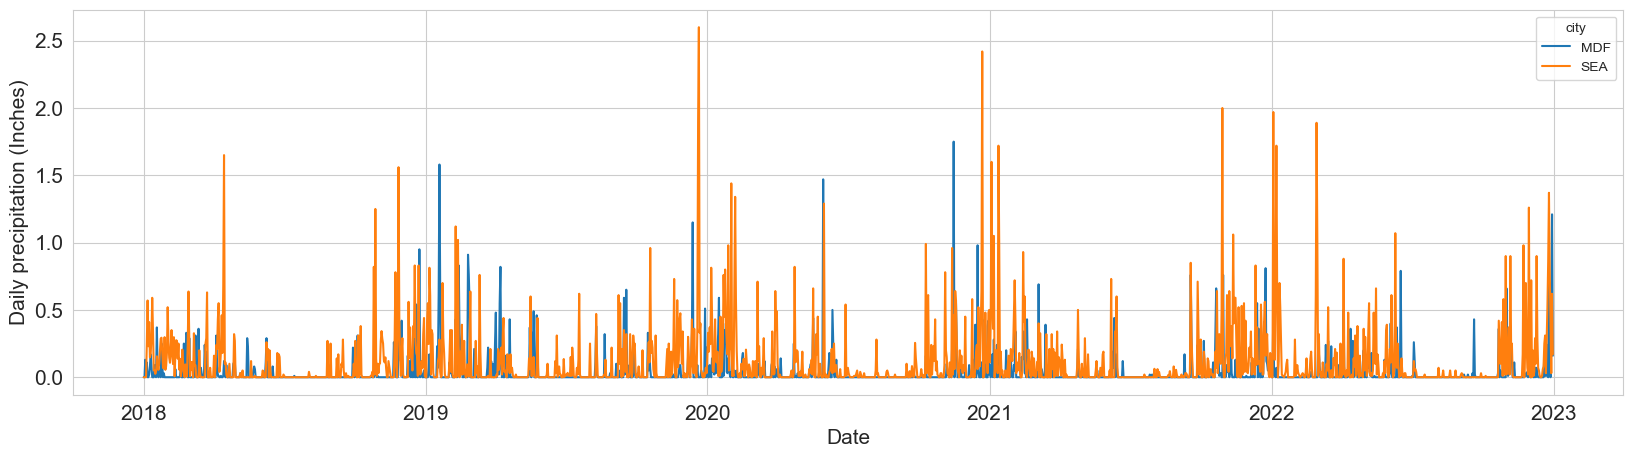

In [42]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = df_combined, x = 'date' , y = 'precipitation', hue='city')

plt.xlabel('Date' , fontsize = 15)
plt.ylabel('Daily precipitation (Inches)', fontsize= 15)

plt.tick_params(labelsize=15)
plt.show()

From this plot, we can make an assumption that it rains more in Seattle than it does in Medford. The Seattle graph seems to overwhelmingly cover most of the plot.

### Calculate and compare the mean values from the cities

In [43]:
df_combined[['city','precipitation']].groupby('city').mean()

,precipitation
city,
MDF,0.042919
SEA,0.113270


Seattle has a mean of 0.11 inches while Medford has a mean of 0.04 inches of rain.  
Will create more plots to investigate the precipitation data.

Will investigate the plots by month by adding another column representing the month

In [44]:
df_combined['month'] = pd.DatetimeIndex(df_combined['date']).month

In [45]:
# df_combined['month'].unique()

Using a boxplot, we will look at the precipitation for each city grouped by month. Note that a box plot shows the distribution by showing the five number summary.

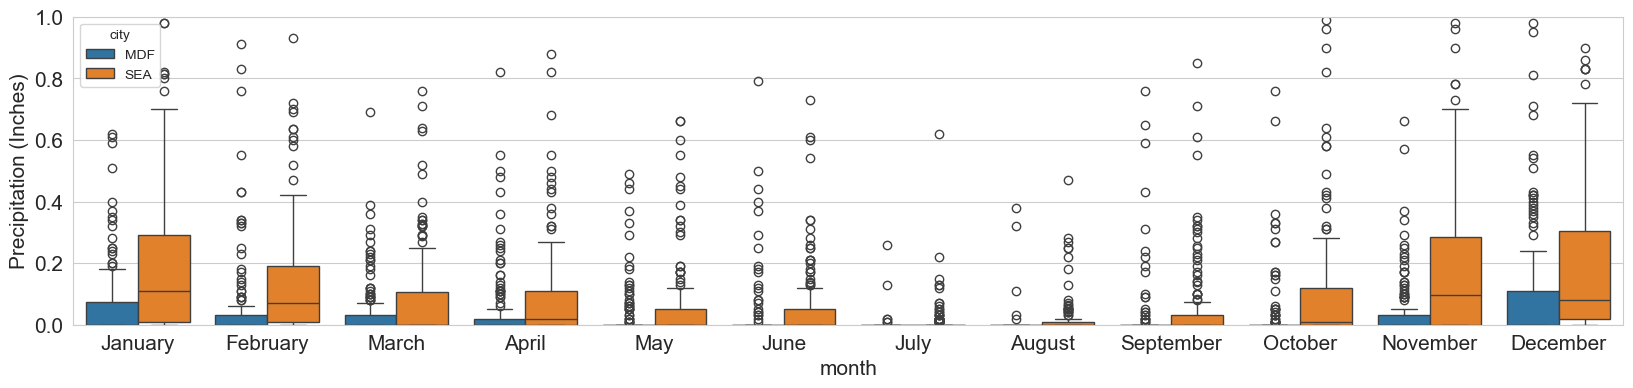

In [46]:
plt.figure(figsize = (20, 4))
sns.boxplot(data = df_combined, x = 'month' , y = 'precipitation', hue='city')

plt.xlabel('month' , fontsize = 15)
plt.ylabel('Precipitation (Inches)', fontsize= 15)

plt.tick_params(labelsize=15)

month_names = list(calendar.month_name[1:]) # Get month names

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 1)

plt.show()

From the plot above, we can see that Seattle's rainfall tends to be more variable than that of Medford. This can be shown from the taller boxes and longer whiskers, meaning rainfall amounts fluctuate more in Seattle.

##### Using a barplot, plot the difference between each month indicating significant differences with a star  
Below is a statistical calculation of the differences in precipitation per month

In [47]:
significance_level = 0.05
significantly_different = np.zeros(12)

#Perform t-test for each month
for month in range (1, 13):
    #Get precipitation data for Seattle and St. Louis for the current month
    sea_data = df_combined.loc[(df_combined['city'] == 'SEA') & (df_combined['month'] == month), 'precipitation']
    mdf_data = df_combined.loc[(df_combined['city'] == 'MDF') & (df_combined['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, mdf_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic:.2f}")
    print(f" pvalue t test = {p_value:.3f}")
    print("-" * 23)

Month 1:
 t-statistic = 5.20
 pvalue t test = 0.000
-----------------------
Month 2:
 t-statistic = 4.24
 pvalue t test = 0.000
-----------------------
Month 3:
 t-statistic = 3.19
 pvalue t test = 0.002
-----------------------
Month 4:
 t-statistic = 2.78
 pvalue t test = 0.006
-----------------------
Month 5:
 t-statistic = 1.70
 pvalue t test = 0.089
-----------------------
Month 6:
 t-statistic = 2.33
 pvalue t test = 0.021
-----------------------
Month 7:
 t-statistic = 2.23
 pvalue t test = 0.027
-----------------------
Month 8:
 t-statistic = 2.44
 pvalue t test = 0.015
-----------------------
Month 9:
 t-statistic = 2.01
 pvalue t test = 0.046
-----------------------
Month 10:
 t-statistic = 3.91
 pvalue t test = 0.000
-----------------------
Month 11:
 t-statistic = 5.60
 pvalue t test = 0.000
-----------------------
Month 12:
 t-statistic = 3.22
 pvalue t test = 0.001
-----------------------


From the statistical calculations above, there is a statistically significant difference in mean monthly precipitation between Medford and Seattle for nearly all months, except May. The strongest differences occur during the winter months, where Seattle tends to receive more precipitation than Medford.

##### Plot the mean precipitation each month with an asterisk for significant differences

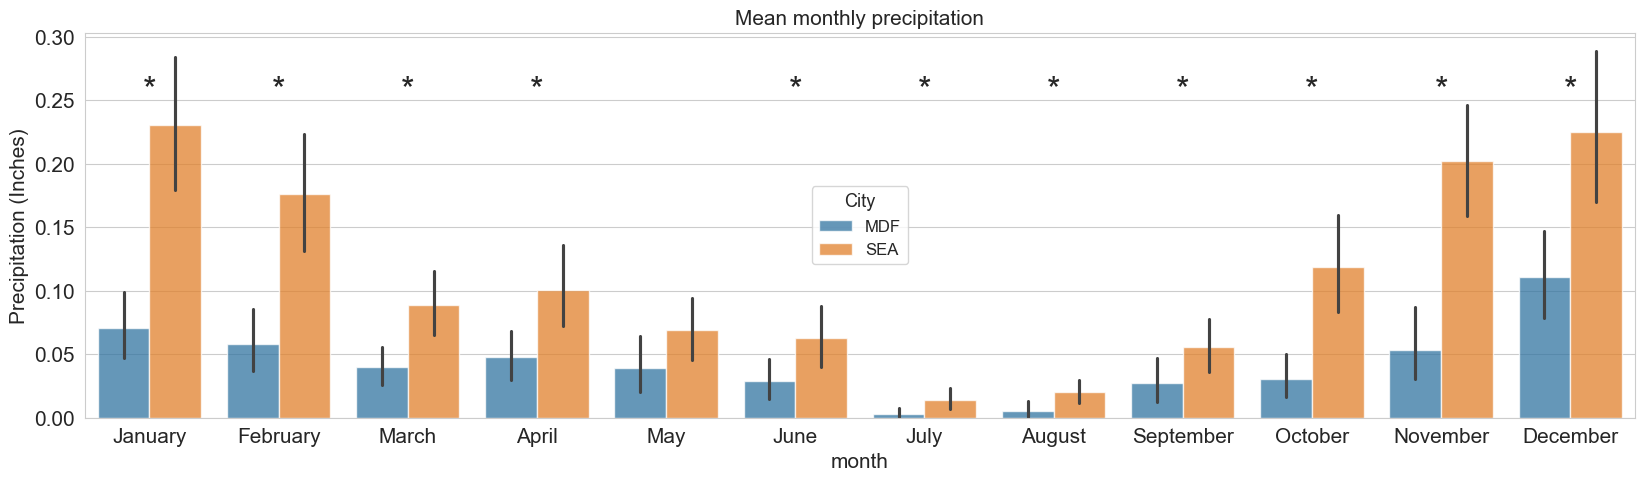

In [48]:
plt.figure(figsize = (20, 5))
sns.barplot(data = df_combined, x = 'month' , y = 'precipitation', hue='city', alpha=0.75)

plt.xlabel('month' , fontsize = 15)
plt.ylabel('Precipitation (Inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.legend(title='City', fontsize=12, title_fontsize=13, loc='center')


#Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:

        #Add a star
        plt.text(month, 0.25, '*', ha='center', fontsize=25)

plt.show()

From the above plot, we can see that there are significant differences for 11 out of the 12 months between Medford and Seattle. A few conclusions can be made from it including:  
1. On average, Seattle receives more rain than Medford does for each month.
2. For both Medford and Seattle, fluctuations in the precipitation can be explained from seasonal changes. There are higher precipitation values during winters and lower during the summers.
3. The largest differences appear in January, February, November, and December.
4. The asterisks (*) above the bars show months where the difference in mean precipitation between the two cities is statistically significant based on the t-test calculated above.
